## Notebook for data analysis of 'projection' sessions [projection/non-projection target groups]

In [2]:
%run ./rob_setup_notebook.ipynb

import utils.interareal_analysis as ia
import utils.interareal_plotting as ip
import utils.utils_funcs as uf
import utils.gsheets_importer as gsi
import ia_funcs as ia 
from utils.paq2py import *

session_type = 'projection'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Suite2p path: ['/home/rlees/anaconda3/envs/suite2p/lib/python3.7/site-packages/suite2p']
QNAP_path: /home/rlees/mnt/qnap 
QNAP_data_path /home/rlees/mnt/qnap/Data 
Pickle folder: /home/rlees/mnt/qnap/pkl_files 
Master pickle: /home/rlees/mnt/qnap/master_pkl/master_obj.pkl 
Figure save path: /home/rlees/mnt/qnap/Analysis/Figures 
STA movie save path: /home/rlees/mnt/qnap/Analysis/STA_movies 
S2 borders path: /home/rlees/mnt/qnap/Analysis/S2_borders


# Data organisation

### For the following dataframes it will be possible to uses the dataframe above to index the dataframe below, or vice versa

## Use cases:
- find average response to pr stim in ps targets
    - use the cell dataframe to get cell IDs for ps targets and index the timepoint dataframe to produce an average response to pr
- find sum or mean dff response on a single trial for pr target cells
    - use the cell dataframe to find pr target cells, use timepoint dataframe to group by trial_num and mean the pre and post

# Construct dataframes

## Session dataframe
- all sessions in project (index = session)
- include information such as:
    - ss_id [string]
    - session_id [string] (sheet_name)
    - s2p_path [string]
    - frame_list [string]
    - x_pix_reg [list] (xoff)
    - y_pix_reg [list] (yoff)
    - mean_img [array]
    - mean_imgE [array]

In [4]:
df_name = session_type + '_session_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    ss_id = ses_obj.ss_id
    session_id = ses_obj.sheet_name
    s2p_path = ses_obj.s2p_path
    frame_list = list(ses_obj.frame_list)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)

    x_pix_reg = list(exp_list[0].xoff)
    y_pix_reg = list(exp_list[0].yoff)
    mean_img = exp_list[0].mean_img[0]
    mean_imgE = exp_list[0].mean_imgE[0]
            
    temp_df = pd.DataFrame({'ss_id'      : ss_id,
                            's2p_path'   : s2p_path,
                            'frame_list' : [frame_list],
                            'x_pix_reg'  : [x_pix_reg],
                            'y_pix_reg'  : [y_pix_reg],
                            'mean_img'   : [mean_img],
                            'mean_imgE'  : [mean_imgE]
                            })
    
    df = pd.concat([df, temp_df])
    index.extend([session_id])
    
df.index = index
df.index.rename('session_id', inplace=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-03-02_RL130.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-10-29_RL111.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-12-10_RL115.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-18_RL127.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-22_RL128.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-23_RL129.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-24_RL132.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-25_RL131.pkl


In [5]:
df

,ss_id,s2p_path,frame_list,x_pix_reg,y_pix_reg,mean_img,mean_imgE
session_id,,,,,,,
2021-03-02_RL130,1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY,/home/rlees/mnt/qnap/Data/2021-03-02/RL130/202...,"[22986, 22986, 22986]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[8.090214333362335, 7.046144029699238, 8.4102...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2020-10-29_RL111,1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY,/home/rlees/mnt/qnap/Data/2020-10-29/RL111/202...,"[22836, 22836, 16977, 22836]","[0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[7.800104890913449, 4.375070366818507, 4.1523...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2020-12-10_RL115,1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY,/home/rlees/mnt/qnap/Data/2020-12-10/RL115/202...,"[22986, 22986, 16977, 22986]","[1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[3.924454529586316, 3.9851864781520923, 4.242...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2021-02-18_RL127,1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY,/home/rlees/mnt/qnap/Data/2021-02-18/RL127/202...,"[22986, 22986, 22986]","[-1, -1, -1, -2, -2, -1, -2, -2, -2, -1, -1, -...","[-1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1...","[[6.5101076017285875, 6.0801357347950935, 4.80...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2021-02-22_RL128,1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY,/home/rlees/mnt/qnap/Data/2021-02-22/RL128/202...,"[22986, 22986, 22986]","[2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[7.877780678093909, 7.585080773804344, 7.4911...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2021-02-23_RL129,1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY,/home/rlees/mnt/qnap/Data/2021-02-23/RL129/202...,"[22986, 22986, 22986]","[1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, 0, -1, 0,...","[[5.473259085240292, 5.1934220830070466, 4.818...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2021-02-24_RL132,1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY,/home/rlees/mnt/qnap/Data/2021-02-24/RL132/202...,"[22986, 22986, 22986]","[-2, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -...","[0, 0, 0, 0, -1, -1, 0, 0, 0, -1, -1, -1, -1, ...","[[7.713115229560023, 7.685083674120479, 6.9643...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2021-02-25_RL131,1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY,/home/rlees/mnt/qnap/Data/2021-02-25/RL131/202...,"[22986, 22986, 22986]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[6.605876040488413, 6.408146988021696, 6.3896...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


## Experiment dataframe
- all experiments i.e. stim types across all sessions (index = session, experiment)
- include information such as:
    - session_id (sheet_name)
    - stim_type
    - tiff_path
    - naparm_path
    - paq_path
    - stim_channel
    - fps
    - frame_x
    - frame_y
    - n_planes
    - pix_sz_x
    - pix_sz_y
    - scan_x
    - scan_y
    - zoom
    - n_frames
    - last_good_frame
    - n_groups
    - n_reps
    - n_shots
    - inter_point_delay
    - single_stim_dur
    - spiral_size
    - stim_dur
    - stim_freq
    - duration_frames
    - frames [tuple]
    - n_units
    - num_s1_cells
    - num_s2_cells
    - pre_frames
    - post_frames
    - test_frames
    - pre_trial_frames
    - post_trial_frames
    - n_trials
    - n_groups = exp_obj.n_groups
    - n_reps = exp_obj.n_reps
    - n_shots = exp_obj.n_shots
    - inter_point_delay = exp_obj.inter_point_delay
    - single_stim_dur = exp_obj.single_stim_dur
    - spiral_size = exp_obj.spiral_size
    - n_targets
    - n_targeted_cells
    - sta_euclid_dist

In [6]:
df_name = session_type + '_experiment_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    for exp_obj in exp_list:
        
        session_id = exp_obj.sheet_name
        stim_type = exp_obj.stim_type
        tiff_path = str(exp_obj.tiff_path)
        naparm_path = str(exp_obj.naparm_path)
        paq_path = str(exp_obj.paq_path)
        stim_channel = exp_obj.stim_channel
        fps = exp_obj.fps
        frame_x = exp_obj.frame_x
        frame_y = exp_obj.frame_y
        n_planes = exp_obj.n_planes
        pix_sz_x = exp_obj.pix_sz_x
        pix_sz_y = exp_obj.pix_sz_y
        scan_x = exp_obj.scan_x
        scan_y = exp_obj.scan_y
        zoom = exp_obj.zoom
        n_frames = int(exp_obj.n_frames)
        last_good_frame = int(exp_obj.last_good_frame)
        stim_dur = exp_obj.stim_dur
        stim_freq = exp_obj.stim_freq
        duration_frames = exp_obj.duration_frames
        frames = exp_obj.frames
        n_units = exp_obj.n_units[0]
        num_s1_cells = exp_obj.num_s1_cells[0]
        num_s2_cells = exp_obj.num_s2_cells[0]
        pre_frames = exp_obj.pre_frames
        post_frames = exp_obj.post_frames
        test_frames = exp_obj.test_frames
        pre_trial_frames = exp_obj.pre_trial_frames
        post_trial_frames = exp_obj.post_trial_frames
        n_trials = exp_obj.n_trials
        
        try:
            n_groups = exp_obj.n_groups
            n_reps = exp_obj.n_reps
            n_shots = exp_obj.n_shots
            inter_point_delay = exp_obj.inter_point_delay
            single_stim_dur = exp_obj.single_stim_dur
            spiral_size = exp_obj.spiral_size
            n_targets = exp_obj.n_targets
            n_targeted_cells = int(exp_obj.n_targeted_cells)
            sta_euclid_dist = exp_obj.sta_euclid_dist
        except AttributeError:
            print('no photostim attributes for this experiment', session_id, stim_type)
            n_groups = np.nan
            n_reps = np.nan
            n_shots = np.nan
            inter_point_delay = np.nan
            single_stim_dur = np.nan
            spiral_size = np.nan
            n_targets = np.nan
            n_targeted_cells = np.nan
            sta_euclid_dist = np.nan
        
        temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                                'stim_type'  : pd.Series(stim_type, dtype='category'),
                                'tiff_path' : tiff_path,
                                'naparm_path' : naparm_path,
                                'paq_path' : paq_path,
                                'stim_channel' : stim_channel,
                                'fps' : fps,
                                'frame_x' : frame_x,
                                'frame_y' : frame_y,
                                'n_planes' : n_planes,
                                'pix_sz_x' : pix_sz_x,
                                'pix_sz_y' : pix_sz_y,
                                'scan_x' : scan_x,
                                'scan_y' : scan_y,
                                'zoom' : zoom,
                                'n_frames' : n_frames,
                                'last_good_frame' : last_good_frame,
                                'stim_dur' : stim_dur,
                                'stim_freq' : stim_freq,
                                'duration_frames' : duration_frames,
                                'frames' : [frames],
                                'n_units' : n_units,
                                'num_s1_cells' : num_s1_cells,
                                'num_s2_cells' : num_s2_cells,
                                'pre_frames' : pre_frames,
                                'post_frames' : post_frames,
                                'test_frames' : test_frames,
                                'pre_trial_frames' : pre_trial_frames,
                                'post_trial_frames' : post_trial_frames,
                                'n_trials' : n_trials,
                                'sta_euclid_dist' : sta_euclid_dist,
                                'n_groups' : n_groups,
                                'n_reps' : n_reps,
                                'n_shots' : n_shots,
                                'inter_point_delay' : inter_point_delay,
                                'single_stim_dur' : single_stim_dur,
                                'spiral_size' : spiral_size,
                                'n_targets' : n_targets,
                                'n_targeted_cells' : n_targeted_cells
                                })
        
        df = pd.concat([df, temp_df])
        experiment_id = session_id + '_' + stim_type
        index.extend([experiment_id])

df.index = index
df.index.rename('experiment_id', inplace=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-03-02_RL130.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-10-29_RL111.pkl
no photostim attributes for this experiment 2020-10-29_RL111 w
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-12-10_RL115.pkl
no photostim attributes for this experiment 2020-12-10_RL115 w
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-18_RL127.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-22_RL128.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-23_RL129.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-24_RL132.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-25_RL131.pkl


In [7]:
df

,session_id,stim_type,tiff_path,naparm_path,paq_path,stim_channel,fps,frame_x,frame_y,n_planes,...,n_trials,sta_euclid_dist,n_groups,n_reps,n_shots,inter_point_delay,single_stim_dur,spiral_size,n_targets,n_targeted_cells
experiment_id,,,,,,,,,,,,,,,,,,,,,
2021-03-02_RL130_pr,2021-03-02_RL130,pr,/home/rlees/mnt/qnap/Data/2021-03-02/RL130/202...,/home/rlees/mnt/qnap/Data/2021-03-02/RL130/202...,/home/rlees/mnt/qnap/Data/2021-03-02/RL130/202...,markpoints2packio,15.023206,1024,1024,1,...,100,95.783917,1.0,10.0,1.0,5.0,10.0,10.0,15.0,35.0
2021-03-02_RL130_ps,2021-03-02_RL130,ps,/home/rlees/mnt/qnap/Data/2021-03-02/RL130/202...,/home/rlees/mnt/qnap/Data/2021-03-02/RL130/202...,/home/rlees/mnt/qnap/Data/2021-03-02/RL130/202...,markpoints2packio,15.023206,1024,1024,1,...,100,132.243159,1.0,10.0,1.0,5.0,10.0,10.0,15.0,41.0
2021-03-02_RL130_none,2021-03-02_RL130,none,/home/rlees/mnt/qnap/Data/2021-03-02/RL130/202...,/home/rlees/mnt/qnap/Data/2021-03-02/RL130/202...,/home/rlees/mnt/qnap/Data/2021-03-02/RL130/202...,markpoints2packio,15.023207,1024,1024,1,...,100,100.459682,1.0,10.0,1.0,5.0,10.0,10.0,17.0,45.0
2020-10-29_RL111_pr,2020-10-29_RL111,pr,/home/rlees/mnt/qnap/Data/2020-10-29/RL111/202...,/home/rlees/mnt/qnap/Data/2020-10-29/RL111/202...,/home/rlees/mnt/qnap/Data/2020-10-29/RL111/202...,markpoints2packio,15.023206,1024,1024,1,...,100,102.717727,2.0,10.0,1.0,5.0,10.0,10.0,27.0,66.0
2020-10-29_RL111_ps,2020-10-29_RL111,ps,/home/rlees/mnt/qnap/Data/2020-10-29/RL111/202...,/home/rlees/mnt/qnap/Data/2020-10-29/RL111/202...,/home/rlees/mnt/qnap/Data/2020-10-29/RL111/202...,markpoints2packio,15.023206,1024,1024,1,...,100,135.089535,2.0,10.0,1.0,5.0,10.0,10.0,27.0,77.0
2020-10-29_RL111_none,2020-10-29_RL111,none,/home/rlees/mnt/qnap/Data/2020-10-29/RL111/202...,/home/rlees/mnt/qnap/Data/2020-10-29/RL111/202...,/home/rlees/mnt/qnap/Data/2020-10-29/RL111/202...,markpoints2packio,15.023206,1024,1024,1,...,100,NaN,2.0,10.0,1.0,5.0,10.0,10.0,27.0,77.0
2020-10-29_RL111_w,2020-10-29_RL111,w,/home/rlees/mnt/qnap/Data/2020-10-29/RL111/202...,none,/home/rlees/mnt/qnap/Data/2020-10-29/RL111/202...,piezo_stim,15.023205,1024,1024,1,...,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-10_RL115_pr,2020-12-10_RL115,pr,/home/rlees/mnt/qnap/Data/2020-12-10/RL115/202...,/home/rlees/mnt/qnap/Data/2020-12-10/RL115/202...,/home/rlees/mnt/qnap/Data/2020-12-10/RL115/202...,markpoints2packio,15.023207,1024,1024,1,...,100,91.085379,1.0,10.0,1.0,5.0,10.0,10.0,20.0,48.0
2020-12-10_RL115_ps,2020-12-10_RL115,ps,/home/rlees/mnt/qnap/Data/2020-12-10/RL115/202...,/home/rlees/mnt/qnap/Data/2020-12-10/RL115/202...,/home/rlees/mnt/qnap/Data/2020-12-10/RL115/202...,markpoints2packio,15.023207,1024,1024,1,...,100,72.329611,1.0,10.0,1.0,5.0,10.0,10.0,19.0,34.0


## Trial dataframe
- all trials across all experiments i.e. stim types for all sessions (index = session, experiment, trial)
    - session_id (sheet_name)
    - stim_type
    - trial_num [float]
    - trial_target_dff
    - trial_target_euclid_dist

In [8]:
df_name = session_type + '_trial_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    for exp_obj in exp_list:
        
        session_id = list(np.repeat(exp_obj.sheet_name, exp_obj.n_trials))
        stim_type = list(np.repeat(exp_obj.stim_type, exp_obj.n_trials))
        experiment_id = [session + '_' + stim for session, stim in zip(session_id,stim_type)]

        trial_num = list(range(1,exp_obj.n_trials+1))
        trial_num_str = np.array(trial_num, dtype='str')
        trial_id = [exp + '_' + trial for exp, trial in zip(experiment_id, trial_num_str)]
        
        try:
            trial_target_dff = exp_obj.trial_target_dff
            trial_target_euclid_dist = exp_obj.trial_euclid_dist
        except AttributeError:
            print('no photostim attributes for this experiment', session_id[0], stim_type[0])
            trial_target_dff = list(np.repeat(np.nan, exp_obj.n_trials))
            trial_target_euclid_dist = list(np.repeat(np.nan, exp_obj.n_trials))
        
        temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                                'stim_type'  : pd.Series(stim_type, dtype='category'),
                                'experiment_id' : experiment_id,
                                'trial_num'  : pd.Series(trial_num, dtype='int8'),
                                'trial_target_dff' : trial_target_dff,
                                'trial_target_euclid_dist' : trial_target_euclid_dist
                                })
        
        df = pd.concat([df, temp_df])
        index.extend(trial_id)
    
df.index = index
df.index.rename('trial_id', inplace=True)
    
# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-03-02_RL130.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-10-29_RL111.pkl
no photostim attributes for this experiment 2020-10-29_RL111 w
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-12-10_RL115.pkl
no photostim attributes for this experiment 2020-12-10_RL115 w
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-18_RL127.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-22_RL128.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-23_RL129.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-24_RL132.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-25_RL131.pkl


In [9]:
df

,session_id,stim_type,experiment_id,trial_num,trial_target_dff,trial_target_euclid_dist
trial_id,,,,,,
2021-03-02_RL130_pr_1,2021-03-02_RL130,pr,2021-03-02_RL130_pr,1,14.487280,74.903793
2021-03-02_RL130_pr_2,2021-03-02_RL130,pr,2021-03-02_RL130_pr,2,9.472382,88.466120
2021-03-02_RL130_pr_3,2021-03-02_RL130,pr,2021-03-02_RL130_pr,3,9.968487,82.649293
2021-03-02_RL130_pr_4,2021-03-02_RL130,pr,2021-03-02_RL130_pr,4,11.814813,76.879827
2021-03-02_RL130_pr_5,2021-03-02_RL130,pr,2021-03-02_RL130_pr,5,6.791199,57.143890
...,...,...,...,...,...,...
2021-02-25_RL131_none_96,2021-02-25_RL131,none,2021-02-25_RL131_none,96,-1.723494,46.578576
2021-02-25_RL131_none_97,2021-02-25_RL131,none,2021-02-25_RL131_none,97,0.028571,86.575394
2021-02-25_RL131_none_98,2021-02-25_RL131,none,2021-02-25_RL131_none,98,9.877005,96.423461


## Cell dataframe
- all cells across all sessions (index = session, cell)
- include information such as:
    - session_id (sheet_name)
    - cell_num
    - cell_id [float]
    - s1_cell [bool]
    - s2_cell [bool]
    - pr_target [bool]
    - ps_target [bool]
    - pr_resp_sign [string]
    - ps_resp_sign [string]
    - spont_resp_sign [string]
    - whisker_resp_sign [string]
    - cell_med [tuple]
    - cell_x [list]
    - cell_y [list]
    - prob_response_pr [float]
    - prob_response_ps [float]
    - prob_response_whisker [float]
    - prob_response_spont
    - sta_sig_pr [bool]
    - sta_sig_ps [bool]
    - sta_sig_whisker [bool]
    - sta_sig_spont [bool]
    - sta_sig_nomulti_pr [bool]
    - sta_sig_nomulti_ps [bool]
    - sta_sig_nomulti_whisker [bool]
    - sta_sig_nomulti [bool]
    - wilcoxons

In [12]:
df_name = session_type + '_cell_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    session_id = list(np.repeat(exp_list[0].sheet_name, exp_list[0].n_units[0]))
    
    cell_num = exp_list[0].cell_id[0]
    cell_num_str = np.array(cell_num, dtype='str')
    cell_id = [session + '_' + cell for session, cell in zip(session_id, cell_num_str)]
    
    s1_cell = exp_list[0].cell_s1[0]
    s2_cell = exp_list[0].cell_s2[0]
    cell_med = exp_list[0].cell_med[0]
    cell_x = exp_list[0].cell_x[0]
    cell_y = exp_list[0].cell_y[0]
    
    for exp_obj in exp_list:
        
        if exp_obj.stim_type == 'pr':
            pr_target = exp_obj.targeted_cells
            pr_resp_pos = exp_obj.sta_amplitudes[0] > 0
            pr_sta_amp_resp = exp_obj.sta_amplitudes[0]
            prob_response_pr = exp_obj.prob_response[0]
            sta_sig_pr = exp_obj.sta_sig[0]
            sta_sig_nomulti_pr = exp_obj.sta_sig_nomulti[0]
            wilcoxons_pr = exp_obj.wilcoxons[0]            
        
        if exp_obj.stim_type == 'ps':
            ps_target = exp_obj.targeted_cells
            ps_resp_pos = exp_obj.sta_amplitudes[0] > 0
            ps_sta_amp_resp = exp_obj.sta_amplitudes[0]
            prob_response_ps = exp_obj.prob_response[0]
            sta_sig_ps = exp_obj.sta_sig[0]
            sta_sig_nomulti_ps = exp_obj.sta_sig_nomulti[0]
            wilcoxons_ps = exp_obj.wilcoxons[0]
        
        if exp_obj.stim_type == 'none':
            spont_resp_pos = exp_obj.sta_amplitudes[0] > 0
            spont_sta_amp_resp = exp_obj.sta_amplitudes[0]
            prob_response_spont = exp_obj.prob_response[0]
            sta_sig_spont = exp_obj.sta_sig[0]
            sta_sig_nomulti_spont = exp_obj.sta_sig_nomulti[0]
            wilcoxons_spont = exp_obj.wilcoxons[0]
        
#         if exp_obj.stim_type == 'w':
#             whisker_resp_pos = exp_obj.sta_amplitudes[0] > 0
#             whisker_sta_amp_resp = exp_obj.sta_amplitudes[0]
#             prob_response_whisker = exp_obj.prob_response[0]
#             sta_sig_whisker = exp_obj.sta_sig[0]
#             sta_sig_nomulti_whisker = exp_obj.sta_sig_nomulti[0]
#             wilcoxons_whisker = exp_obj.wilcoxons[0]
        
    temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                            'cell_num' : pd.Series(cell_num, dtype='int16'),
                            's1_cell' : s1_cell,
                            's2_cell' : s2_cell,
                            'cell_med' : cell_med,
                            'cell_x' : cell_x,
                            'cell_y' : cell_y,
                            'pr_target' : pr_target,
                            'ps_target' : ps_target,
                            'pr_sta_amp_resp' : pr_sta_amp_resp,
                            'ps_sta_amp_resp' : ps_sta_amp_resp,
                            'spont_sta_amp_resp' : spont_sta_amp_resp,
#                             'whisker_sta_amp_resp' : whisker_sta_amp_resp,
                            'pr_resp_sign' : pr_resp_pos,
                            'ps_resp_sign' : ps_resp_pos,
                            'spont_resp_sign' : spont_resp_pos,
#                             'whisker_resp_sign' : whisker_resp_pos,
                            'prob_response_pr' : prob_response_pr,
                            'prob_response_ps' : prob_response_ps,
                            'prob_response_spont' : prob_response_spont,
#                             'prob_response_whisker' : prob_response_whisker,
                            'sta_sig_pr' : sta_sig_pr,
                            'sta_sig_ps' : sta_sig_ps,
                            'sta_sig_spont' : sta_sig_spont,
#                             'sta_sig_whisker' : sta_sig_whisker,
                            'sta_sig_nomulti_pr' : sta_sig_nomulti_pr,
                            'sta_sig_nomulti_ps' : sta_sig_nomulti_ps,
                            'sta_sig_nomulti_spont' : sta_sig_nomulti_spont,
#                             'sta_sig_nomulti_whisker' : sta_sig_nomulti_whisker,
                            'wilcoxons_pr' : wilcoxons_pr,
                            'wilcoxons_ps' : wilcoxons_ps,
                            'wilcoxons_spont' : wilcoxons_spont,
#                             'wilcoxons_whisker' : wilcoxons_whisker
                            })
        
    df = pd.concat([df, temp_df])
    index.extend(cell_id)
    
df.index = index
df.index.rename('cell_id', inplace=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-03-02_RL130.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-10-29_RL111.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-12-10_RL115.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-18_RL127.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-22_RL128.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-23_RL129.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-24_RL132.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-25_RL131.pkl


In [13]:
df

,session_id,cell_num,s1_cell,s2_cell,cell_med,cell_x,cell_y,pr_target,ps_target,pr_sta_amp_resp,...,prob_response_spont,sta_sig_pr,sta_sig_ps,sta_sig_spont,sta_sig_nomulti_pr,sta_sig_nomulti_ps,sta_sig_nomulti_spont,wilcoxons_pr,wilcoxons_ps,wilcoxons_spont
cell_id,,,,,,,,,,,,,,,,,,,,,
2021-03-02_RL130_1,2021-03-02_RL130,1,True,False,"[417.0, 424.0]","[434, 435, 433, 434, 431, 432, 433, 429, 430, ...","[409, 409, 410, 410, 411, 411, 411, 412, 412, ...",False,False,-0.034527,...,0.35,True,True,False,True,True,False,0.000502,3.005464e-07,0.234180
2021-03-02_RL130_3,2021-03-02_RL130,3,True,False,"[369.5, 348.0]","[343, 348, 343, 344, 345, 346, 347, 348, 349, ...","[365, 365, 366, 366, 366, 366, 366, 366, 366, ...",False,False,-0.056076,...,0.35,True,True,False,True,True,False,0.000062,1.268672e-06,0.579873
2021-03-02_RL130_4,2021-03-02_RL130,4,False,True,"[238.0, 793.0]","[792, 790, 791, 792, 793, 794, 790, 791, 792, ...","[231, 232, 232, 232, 232, 232, 233, 233, 233, ...",False,False,-0.006864,...,0.27,False,True,False,False,True,False,0.080695,2.017388e-04,0.086213
2021-03-02_RL130_5,2021-03-02_RL130,5,True,False,"[77.0, 527.0]","[525, 526, 527, 528, 524, 525, 526, 527, 528, ...","[71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 7...",False,False,0.035658,...,0.19,False,False,False,False,False,True,0.154601,2.943212e-01,0.018170
2021-03-02_RL130_6,2021-03-02_RL130,6,False,True,"[593.0, 504.0]","[504, 505, 506, 507, 508, 509, 510, 502, 503, ...","[587, 587, 587, 587, 587, 587, 587, 588, 588, ...",False,False,-0.021828,...,0.33,False,False,False,True,False,False,0.027286,7.465419e-01,0.625378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-25_RL131_4205,2021-02-25_RL131,4205,True,False,"[166.0, 220.0]","[220, 218, 219, 220, 221, 216, 217, 218, 219, ...","[159, 160, 160, 160, 160, 161, 161, 161, 161, ...",False,False,-0.006312,...,0.06,False,False,False,False,False,False,0.915116,9.725715e-01,0.591697
2021-02-25_RL131_4206,2021-02-25_RL131,4206,True,False,"[41.0, 558.0]","[553, 554, 555, 556, 557, 552, 553, 554, 555, ...","[36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 3...",False,False,-0.004050,...,0.09,False,False,False,False,False,False,0.723228,4.034290e-01,0.200877
2021-02-25_RL131_4215,2021-02-25_RL131,4215,False,True,"[674.0, 641.0]","[639, 641, 642, 637, 638, 639, 640, 641, 642, ...","[668, 668, 668, 669, 669, 669, 669, 669, 669, ...",False,False,-0.163159,...,0.05,False,False,False,False,False,False,0.126856,4.190869e-01,0.858100


## Cell trial dataframe
- all trials across all cells for all sessions (index = session, cell, trial)
- include information such as:
    - session_id (sheet_name)
    - cell_num
    - cell_id
    - trial_num [float]
    - trial_sig_dff [bool]
    - trial_sig_dfsf [bool]
    - amp_resp

In [16]:
df_name = session_type + '_cell_trial_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    session_id = list(np.repeat(exp_list[0].sheet_name, exp_list[0].n_units[0] * 100))

    cell_num = np.repeat(exp_list[0].cell_id[0], 100, axis=0)
    cell_num_str = np.array(cell_num, dtype='str')
    cell_id = [session + '_' + cell for session, cell in zip(session_id, cell_num_str)]

    trial_num = np.tile(np.arange(1,101), len(exp_list[0].cell_id[0]))
    trial_num_str = np.array(trial_num, dtype='str')

    cell_trial_id = [session + '_' + cell + '_' + trial for session, cell, trial in zip(session_id, cell_num_str, trial_num_str)]
    
    for exp_obj in exp_list:
        
        if exp_obj.stim_type == 'pr':
            trial_sig_dff_pr = pd.Series(exp_obj.trial_sig_dff[0].flatten()).reindex(np.arange(0,len(trial_num)))
            trial_sig_dfsf_pr = pd.Series(exp_obj.trial_sig_dfsf[0].flatten()).reindex(np.arange(0,len(trial_num)))
            pr_amp_resp = pd.Series(exp_obj.all_amplitudes[0].flatten()).reindex(np.arange(0,len(trial_num)))
            
        if exp_obj.stim_type == 'ps':
            trial_sig_dff_ps = pd.Series(exp_obj.trial_sig_dff[0].flatten()).reindex(np.arange(0,len(trial_num)))
            trial_sig_dfsf_ps = pd.Series(exp_obj.trial_sig_dfsf[0].flatten()).reindex(np.arange(0,len(trial_num)))
            ps_amp_resp = pd.Series(exp_obj.all_amplitudes[0].flatten()).reindex(np.arange(0,len(trial_num)))
                    
        if exp_obj.stim_type == 'none':
            trial_sig_dff_spont = pd.Series(exp_obj.trial_sig_dff[0].flatten()).reindex(np.arange(0,len(trial_num)))
            trial_sig_dfsf_spont = pd.Series(exp_obj.trial_sig_dfsf[0].flatten()).reindex(np.arange(0,len(trial_num)))
            spont_amp_resp = pd.Series(exp_obj.all_amplitudes[0].flatten()).reindex(np.arange(0,len(trial_num)))
                    
#         if exp_obj.stim_type == 'w':
#             trial_sig_dff_whisker = pd.Series(exp_obj.trial_sig_dff[0].flatten()).reindex(np.arange(0,len(trial_num)))
#             trial_sig_dfsf_whisker = pd.Series(exp_obj.trial_sig_dfsf[0].flatten()).reindex(np.arange(0,len(trial_num)))
#             whisker_amp_resp = pd.Series(exp_obj.all_amplitudes[0].flatten()).reindex(np.arange(0,len(trial_num)))
                    
    temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                            'cell_num' : pd.Series(cell_num, dtype='int16'),
                            'cell_id' : pd.Series(cell_id, dtype='category'),
                            'trial_num' : pd.Series(trial_num, dtype='int8'),
                            'pr_amp_resp' : pr_amp_resp,
                            'ps_amp_resp' : ps_amp_resp,
                            'spont_amp_resp' : spont_amp_resp,
#                             'whisker_amp_resp' : whisker_amp_resp,
                            'trial_sig_dff_pr' : trial_sig_dff_pr,
                            'trial_sig_dfsf_pr' : trial_sig_dfsf_pr,
                            'trial_sig_dff_ps' : trial_sig_dff_ps,
                            'trial_sig_dfsf_ps' : trial_sig_dfsf_ps,
                            'trial_sig_dff_spont' : trial_sig_dff_spont,
                            'trial_sig_dfsf_spont' : trial_sig_dfsf_spont,
#                             'trial_sig_dff_whisker' : trial_sig_dff_whisker,
#                             'trial_sig_dfsf_whisker' : trial_sig_dfsf_whisker,
                            })
        
    df = pd.concat([df, temp_df])
    index.extend(cell_trial_id)
    
df.index = index
df.index.rename('cell_trial_id', inplace=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-03-02_RL130.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-10-29_RL111.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-12-10_RL115.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-18_RL127.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-22_RL128.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-23_RL129.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-24_RL132.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-25_RL131.pkl


In [17]:
df

,session_id,cell_num,cell_id,trial_num,pr_amp_resp,ps_amp_resp,spont_amp_resp,trial_sig_dff_pr,trial_sig_dfsf_pr,trial_sig_dff_ps,trial_sig_dfsf_ps,trial_sig_dff_spont,trial_sig_dfsf_spont
cell_trial_id,,,,,,,,,,,,,
2021-03-02_RL130_1_1,2021-03-02_RL130,1,2021-03-02_RL130_1,1,-0.137108,0.510589,0.118253,False,False,True,True,True,False
2021-03-02_RL130_1_2,2021-03-02_RL130,1,2021-03-02_RL130_1,2,-0.149006,0.469362,0.008647,False,False,True,True,False,False
2021-03-02_RL130_1_3,2021-03-02_RL130,1,2021-03-02_RL130_1,3,-0.241175,-0.049712,0.072115,True,False,False,False,True,False
2021-03-02_RL130_1_4,2021-03-02_RL130,1,2021-03-02_RL130_1,4,-0.048099,0.422570,0.139713,False,False,True,True,True,True
2021-03-02_RL130_1_5,2021-03-02_RL130,1,2021-03-02_RL130_1,5,-0.049640,-0.168376,0.106109,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-25_RL131_4217_96,2021-02-25_RL131,4217,2021-02-25_RL131_4217,96,-0.245848,-0.167322,-0.422542,False,False,False,False,False,False
2021-02-25_RL131_4217_97,2021-02-25_RL131,4217,2021-02-25_RL131_4217,97,0.337160,-0.179055,0.310064,False,False,False,False,False,False
2021-02-25_RL131_4217_98,2021-02-25_RL131,4217,2021-02-25_RL131_4217,98,-0.081623,0.462803,0.354718,False,False,False,False,False,False


## Cell mean timepoint dataframe
- all timepoints across all cells for all trial averages i.e. sessions (index = session, cell, timepoint)
- include information such as:
    - session_id (sheet_name)
    - cell_num
    - cell_id [float]
    - timepoint [timepoints] (a.k.a. time)
    - pr_sta_resp [dff]
    - ps_sta_resp [dff]
    - w_sta_resp [dff]
    - spont_sta_resp [dff]

In [18]:
df_name = session_type + '_cell_mean_timepoint_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    session_id = list(np.repeat(exp_list[0].sheet_name, exp_list[0].n_units[0] * len(exp_list[0].time)))
    
    cell_num = np.repeat(exp_list[0].cell_id[0], len(exp_list[0].time), axis=0)
    cell_id = np.array(cell_num, dtype='str')
    cell_id = np.char.add(np.char.add(session_id, np.repeat('_', len(session_id))), cell_id)
    
    timepoint = np.tile(exp_list[0].time, exp_list[0].n_units[0])
    frame = np.tile(np.arange(len(exp_list[0].time)), exp_list[0].n_units[0])
    
    for exp_obj in exp_list:
        
        if exp_obj.stim_type == 'pr':
            pr_sta_resp = exp_obj.stas[0].flatten()
            
        if exp_obj.stim_type == 'ps':
            ps_sta_resp = exp_obj.stas[0].flatten()
                    
        if exp_obj.stim_type == 'none':
            spont_sta_resp = exp_obj.stas[0].flatten()
                    
#         if exp_obj.stim_type == 'w':
#             whisker_sta_resp = exp_obj.stas[0].flatten()

    temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                            'cell_num' : pd.Series(cell_num, dtype='int16'),
                            'cell_id' : pd.Series(cell_id, dtype='category'),
                            'frame' : pd.Series(frame, dtype='int16'),
                            'timepoint' : pd.Series(timepoint, dtype='float32'),
                            'pr_sta_resp' : pr_sta_resp,
                            'ps_sta_resp' : ps_sta_resp,
                            'spont_sta_resp' : spont_sta_resp,
#                             'whisker_sta_resp' : whisker_sta_resp
                            })
        
    df = pd.concat([df, temp_df])

df.reset_index(drop=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-03-02_RL130.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-10-29_RL111.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-12-10_RL115.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-18_RL127.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-22_RL128.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-23_RL129.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-24_RL132.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-25_RL131.pkl


In [19]:
df

,session_id,cell_num,cell_id,frame,timepoint,pr_sta_resp,ps_sta_resp,spont_sta_resp
0,2021-03-02_RL130,1,2021-03-02_RL130_1,0,-2.063474,-0.024883,0.040401,-0.022667
1,2021-03-02_RL130,1,2021-03-02_RL130_1,1,-1.996543,-0.008078,0.026212,-0.015120
2,2021-03-02_RL130,1,2021-03-02_RL130_1,2,-1.929611,-0.005527,0.033586,-0.004089
3,2021-03-02_RL130,1,2021-03-02_RL130_1,3,-1.862680,0.010281,0.021461,-0.004725
4,2021-03-02_RL130,1,2021-03-02_RL130_1,4,-1.795748,0.004791,0.014220,-0.008676
...,...,...,...,...,...,...,...,...
445531,2021-02-25_RL131,4217,2021-02-25_RL131_4217,177,9.783391,0.036593,-0.114932,-0.093887
445532,2021-02-25_RL131,4217,2021-02-25_RL131_4217,178,9.850322,0.038587,0.038813,-0.124942
445533,2021-02-25_RL131,4217,2021-02-25_RL131_4217,179,9.917253,-0.068956,0.016863,-0.089348
445534,2021-02-25_RL131,4217,2021-02-25_RL131_4217,180,9.984185,-0.042602,0.067655,-0.066567


## Cell trial single timepoint dataframe
- all timepoints across all cells for all trials (index = session, cell, trial, timepoint)
- include information such as:
    - session_id (sheet_name)
    - cell_num
    - cell_id [float]
    - trial_num [float]
    - timepoint [timepoints] (a.k.a. time)
    - pr_resp [dff]
    - ps_resp [dff]
    - w_resp [dff]
    - spont_resp [dff]
- include later?:
    - pr_amp_resp
    - ps_amp_resp
    - w_amp_resp
    - spont_amp_resp

In [3]:
df_name = session_type + '_cell_trial_single_timepoint_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(pkl_folder, string='.pkl')

df = pd.DataFrame()

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    session_id = list(np.repeat(exp_list[0].sheet_name, exp_list[0].n_units[0] * 100 * len(exp_list[0].time)))
    
    cell_num = np.repeat(exp_list[0].cell_id[0], 100 * len(exp_list[0].time), axis=0)
    cell_id = np.array(cell_num, dtype='str')
    cell_id = np.char.add(np.char.add(session_id, np.repeat('_', len(session_id))), cell_id)
    
    trial_num = np.tile(np.repeat(np.arange(1,101), len(exp_list[0].time)), len(exp_list[0].cell_id[0]))
    
    timepoint = np.tile(exp_list[0].time, exp_list[0].n_units[0] * 100)
    frame = np.tile(np.arange(len(exp_list[0].time)), exp_list[0].n_units[0] * 100)
    
    for exp_obj in exp_list:
        
        all_trials = np.swapaxes(exp_obj.all_trials[0], 1, 2)
        
        if exp_obj.stim_type == 'pr':
            pr_resp = pd.Series(all_trials.flatten()).reindex(np.arange(0,len(trial_num)))
            
        if exp_obj.stim_type == 'ps':
            ps_resp = pd.Series(all_trials.flatten()).reindex(np.arange(0,len(trial_num)))
                    
        if exp_obj.stim_type == 'none':
            spont_resp = pd.Series(all_trials.flatten()).reindex(np.arange(0,len(trial_num)))
                    
#         if exp_obj.stim_type == 'w':
#             whisker_resp = pd.Series(all_trials.flatten()).reindex(np.arange(0,len(trial_num)))

    temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                            'cell_num' : pd.Series(cell_num, dtype='int16'),
                            'cell_id' : pd.Series(cell_id, dtype='category'),
                            'trial_num' : pd.Series(trial_num, dtype='int8'),
                            'timepoint' : pd.Series(timepoint, dtype='float32'),
                            'pr_resp' : pr_resp,
                            'ps_resp' : ps_resp,
                            'spont_resp' : spont_resp,
#                             'whisker_resp' : whisker_resp
                            })
        
    df = pd.concat([df, temp_df])
    
df.reset_index(drop=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-03-02_RL130.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-10-29_RL111.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2020-12-10_RL115.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-18_RL127.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-22_RL128.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-23_RL129.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-24_RL132.pkl
Loading pickle: /home/rlees/mnt/qnap/pkl_files/2021-02-25_RL131.pkl


In [4]:
df

,session_id,cell_num,cell_id,trial_num,timepoint,pr_resp,ps_resp,spont_resp
0,2021-03-02_RL130,1,2021-03-02_RL130_1,1,-2.063474,-0.447380,0.235535,0.128741
1,2021-03-02_RL130,1,2021-03-02_RL130_1,1,-1.996543,-0.321419,0.028893,0.185530
2,2021-03-02_RL130,1,2021-03-02_RL130_1,1,-1.929611,-0.431680,-0.019810,-0.012941
3,2021-03-02_RL130,1,2021-03-02_RL130_1,1,-1.862680,-0.551474,0.174890,0.122835
4,2021-03-02_RL130,1,2021-03-02_RL130_1,1,-1.795748,-0.285447,-0.034269,0.128728
...,...,...,...,...,...,...,...,...
44553595,2021-02-25_RL131,4217,2021-02-25_RL131_4217,100,9.783391,-0.319699,-0.201426,-0.388505
44553596,2021-02-25_RL131,4217,2021-02-25_RL131_4217,100,9.850322,-1.140633,0.738067,0.412073
44553597,2021-02-25_RL131,4217,2021-02-25_RL131_4217,100,9.917253,-2.217348,2.886163,-0.845482
44553598,2021-02-25_RL131,4217,2021-02-25_RL131_4217,100,9.984185,-0.933447,0.440431,-0.455976


# Find extreme responses from cells (plot to confirm)

In [5]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

<AxesSubplot:xlabel='timepoint', ylabel='ps_sta_resp'>

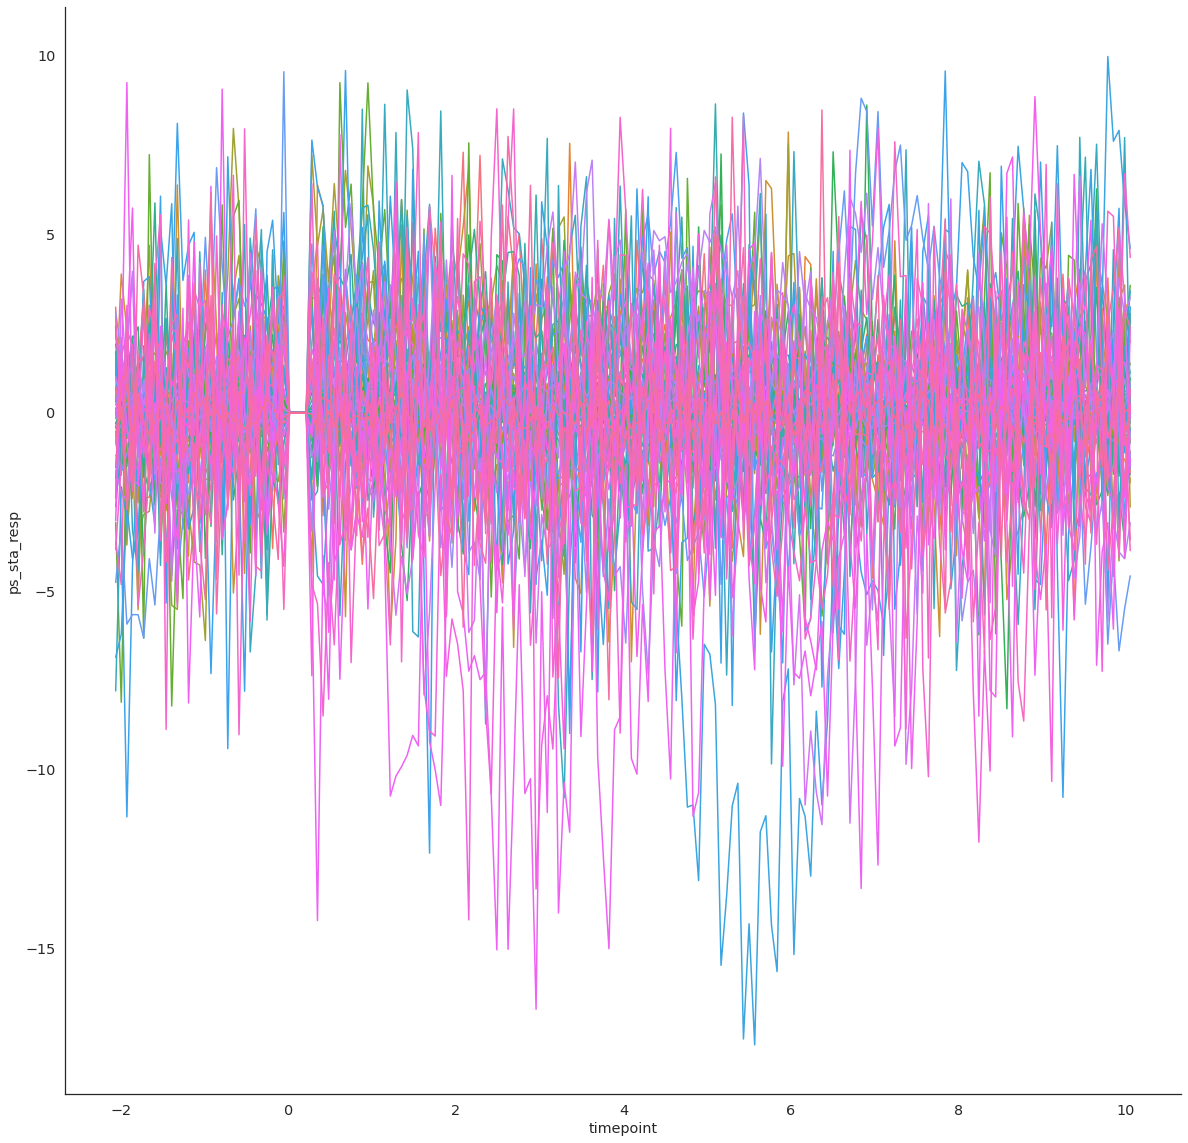

In [19]:
max_df = cell_mean_timepoint_df.groupby('cell_id').max()

threshold = 10
data = max_df[(np.absolute(max_df['pr_sta_resp']) > threshold) |\
              (np.absolute(max_df['ps_sta_resp']) > threshold) |\
              (np.absolute(max_df['spont_sta_resp']) > threshold)
             ]
extreme_cell_ids = data.index

df_ids = cell_mean_timepoint_df['cell_id'].isin(extreme_cell_ids)
data = cell_mean_timepoint_df[df_ids]

fig,ax = plt.subplots(figsize=(20,20))
sns.lineplot(y='ps_sta_resp', x='timepoint', hue='cell_id', data=data, legend=False)

In [10]:
#Remove extreme cells
max_df = cell_mean_timepoint_df.groupby('cell_id').max()

threshold = 10
data = max_df[(np.absolute(max_df['pr_sta_resp']) > threshold) | \
              (np.absolute(max_df['ps_sta_resp']) > threshold) | \
              (np.absolute(max_df['spont_sta_resp']) > threshold)
             ]

extreme_cells = data.index

extreme_cell_ids = cell_df.index.isin(extreme_cells)
cell_df = cell_df[~extreme_cell_ids]

cell_df.to_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')

In [11]:
extreme_cell_ids = cell_mean_timepoint_df['cell_id'].isin(extreme_cells)
cell_mean_timepoint_df = cell_mean_timepoint_df[~extreme_cell_ids]

cell_mean_timepoint_df.to_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# Mean trial traces (lineplot)
## plots = fdr vs nomulti correction / trial type
## cols = target, non-target, s2
## rows = positive responder, non-responding, negative responder

In [312]:
# cell_df.query(test + '&~' + target + '& s1_cell' + '&' + sign + '').index
# cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index

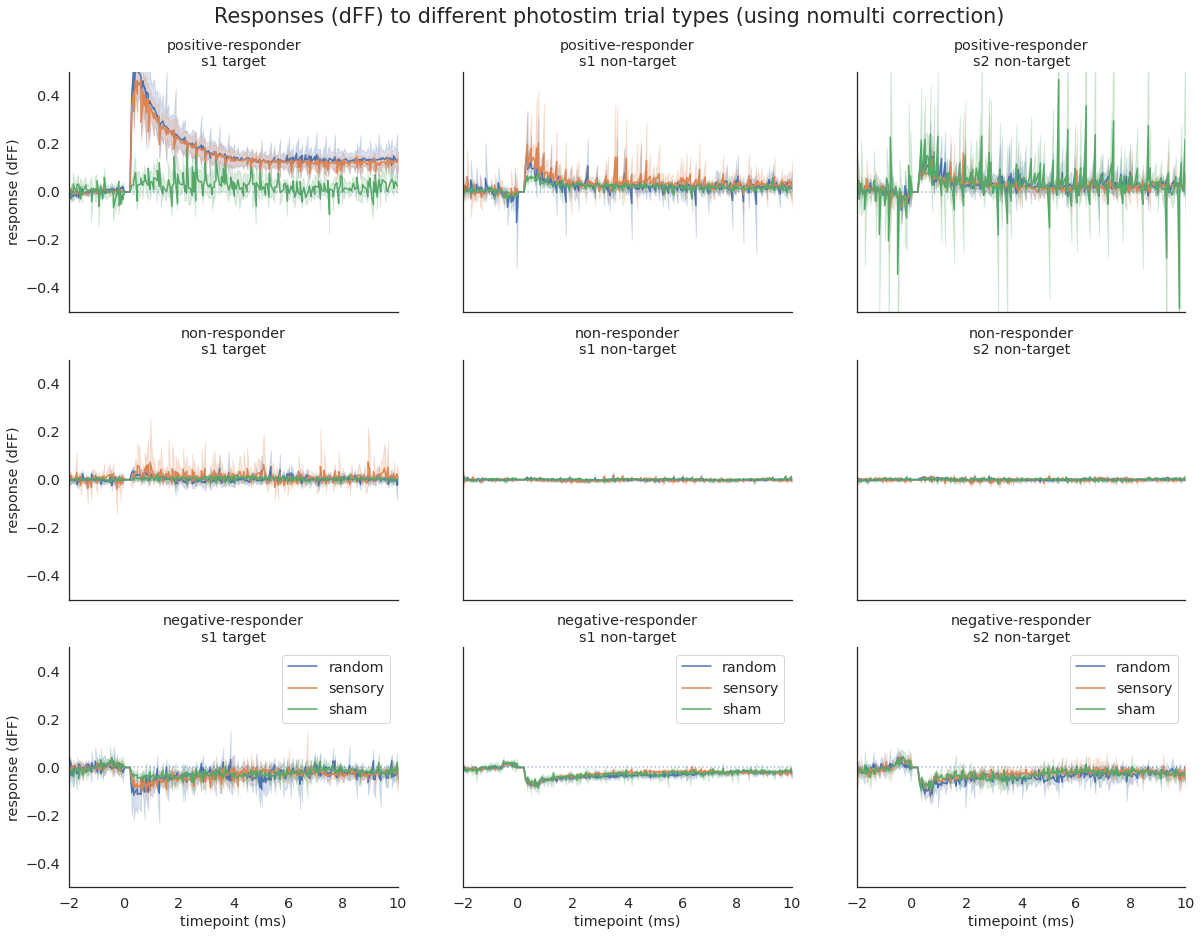

In [13]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# list of column names to be used to filter the dataframe
test_type = 'nomulti'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
resp_sign = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']

fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True, figsize=(20,15))

for test, trial, target, sign, response in zip(stat_test, trial_type, target_type, resp_sign, responses):

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].index

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].index

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].index
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].index
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for row, cell_id_lists in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                         [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                         [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                        ]):
        for col, cell_id_list in enumerate(cell_id_lists):
            
            df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
            filtered_df = cell_mean_timepoint_df[df_filter]
            
            ax = axes[row,col]
            sns.lineplot(x='timepoint', y=response, estimator='mean', ci=95, data=filtered_df, ax=ax, label=trial, legend=False)

# define plot titles, axes etc.
plt.suptitle('Responses (dFF) to different photostim trial types (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');

sign = ['positive-responder', 'non-responder', 'negative-responder']
photostim_id = ['s1 target', 's1 non-target', 's2 non-target']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        if row_i == 2: 
            col.set_xlabel('timepoint (ms)')
            col.legend()
        if col_i == 0: col.set_ylabel('response (dFF)')
        col.set_title(sign[row_i] + '\n' + photostim_id[col_i])
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5);
        col.set_ylim([-0.5, 0.5])
        col.set_xlim([-2, 10])

save_path = os.path.join(qnap_path, session_type + '_DffTrace_TrialMean_' + test_type + '_lineplot_row_ResponseType_col_TargetID')
ia.savePlot(save_path)

# Number of responding cells (swarmplot)
## plots = fdr vs nomulti correction
## cols = trial type
## rows = responder type
## boxes = target identity

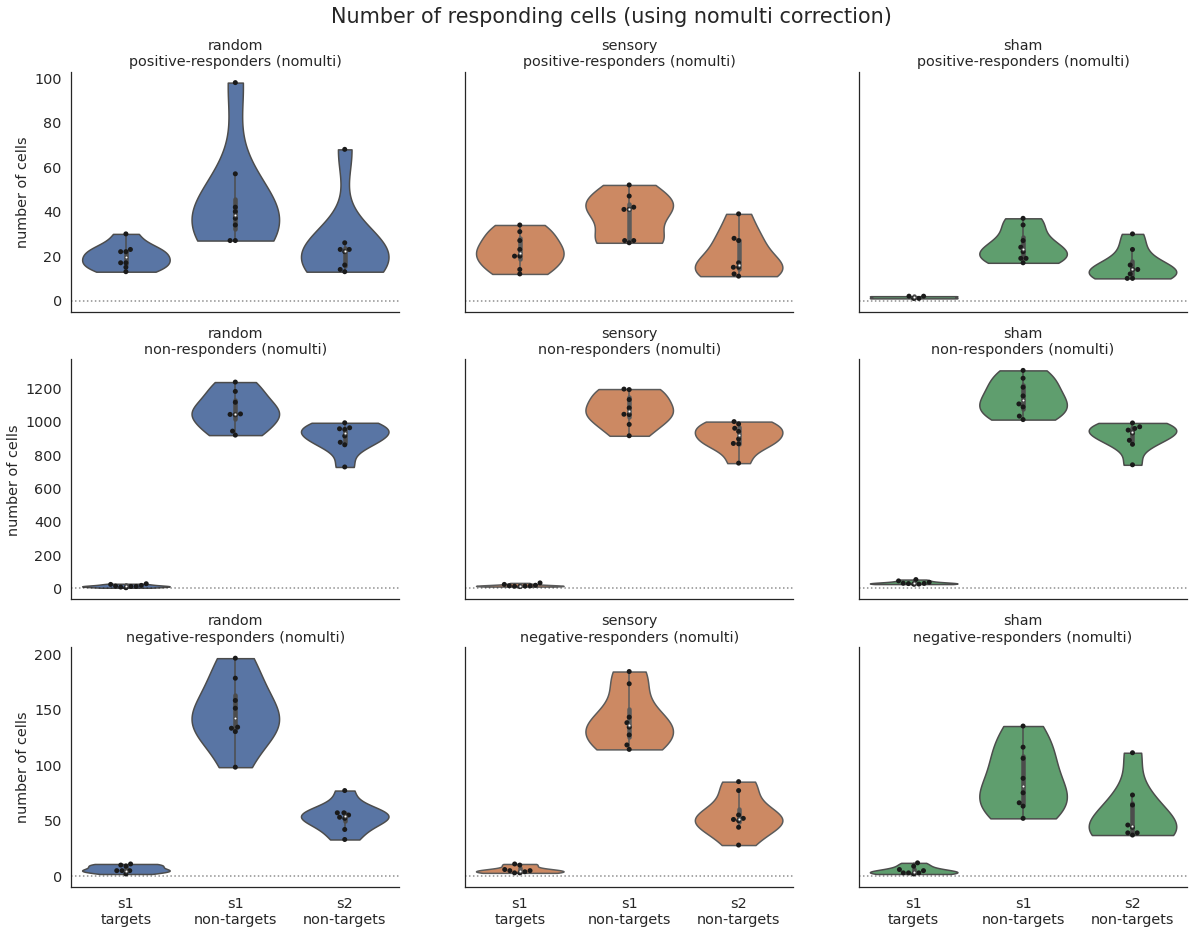

In [9]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# list of column names to be used to filter the dataframe
test_type = 'nomulti'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
trial_type = ['random', 'sensory', 'sham']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').count()
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').count()
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].groupby('session_id').count()

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').count()
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').count()
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].groupby('session_id').count()

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').count()
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').count()
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').count()
    
    for row, df_count in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                    [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                    [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                   ]):
        df = pd.DataFrame({'s1\ntargets'     : df_count[0]['cell_num'],
                           's1\nnon-targets' : df_count[1]['cell_num'],
                           's2\nnon-targets' : df_count[2]['cell_num']
                          })
        sns.swarmplot(data=df, ax=axes[row, stim_id], color='k', edgecolor='k')
        color = 'C' + str(stim_id)
        sns.violinplot(data=df, ax=axes[row, stim_id], color=color, cut=0, scale='width')

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(trial_type[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('number of cells')
        col.hlines(0, -0.5, 2.5, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Number of responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_NumRespondingCells_' + test_type + '_boxswarmplot_row_ResponseType_col_TrialType_splitby_TargetID')
ia.savePlot(save_path)

# Total activity in responding cells (swarmplot)
## plots = fdr vs nomulti correction
## cols = trial type
## rows = responder type
## boxes = target identity

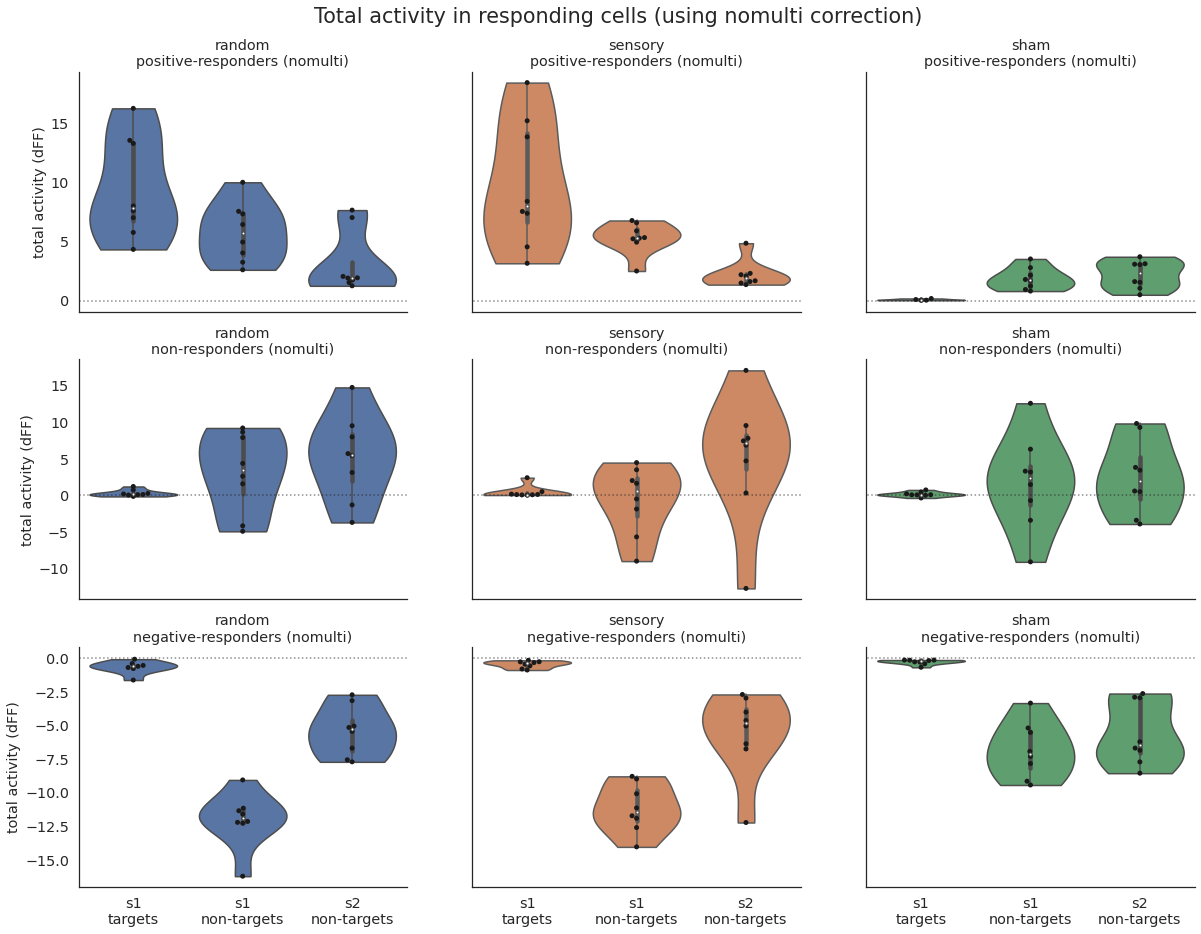

In [10]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# list of column names to be used to filter the dataframe
test_type = 'nomulti'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']
trial_type = ['random', 'sensory', 'sham']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').sum()
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].groupby('session_id').sum()

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].groupby('session_id').sum()

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').sum()
    
    for row, summed_df in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                    [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                    [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                   ]):
        df = pd.DataFrame({'s1\ntargets'     : summed_df[0][response],
                           's1\nnon-targets' : summed_df[1][response],
                           's2\nnon-targets' : summed_df[2][response]
                          })
        sns.swarmplot(data=df, ax=axes[row, stim_id], color='k', edgecolor='k')
        color = 'C' + str(stim_id)
        sns.violinplot(data=df, ax=axes[row, stim_id], color=color, cut=0, scale='width')

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(trial_type[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('total activity (dFF)')
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Total activity in responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_TotalActivity_' + test_type + '_boxswarmplot_row_ResponseType_col_TrialType_splitby_TargetID')
ia.savePlot(save_path)

# Input vs output activity in responding cells (scatterplot)
## plots = fdr vs nomulti correction
## cols = local vs downstream
## rows = responder type
## splitby = trial type

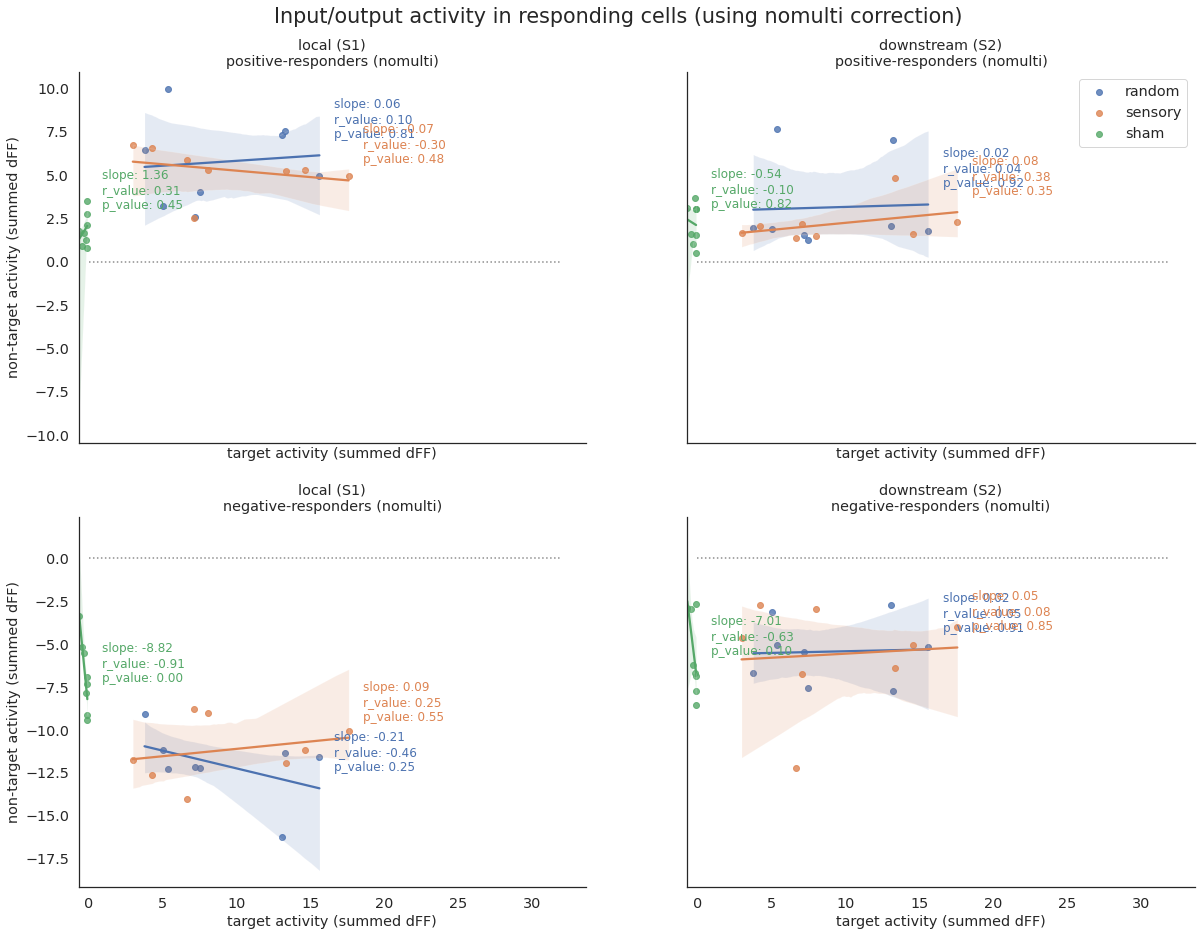

In [11]:
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')

# list of column names to be used to filter the dataframe
test_type = 'nomulti'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
    trial_type = ['random', 'sensory']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
    trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=2, ncols=2, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].groupby('session_id').sum()

    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    
    for row, pos_neg_df in enumerate([[s1_nontargets_pos, s2_nontargets_pos],
                                      [s1_nontargets_neg, s2_nontargets_neg]                              
                                     ]):
        for col, target_nontarget_df in enumerate(pos_neg_df):
            df = pd.DataFrame({'target activity (summed dFF)'    : s1_targets[response],
                               'non-targets'                     : target_nontarget_df[response]
                              })
            p = sns.regplot(x='target activity (summed dFF)', y='non-targets', data=df, label=trial, ax=axes[row, col], ci=95, fit_reg=True)
            
            df = df.dropna() # remove axes containing NaN values (otherwise linregress doesn't function correctly)
            slope, _, r_value, p_value, _ = stats.linregress(x=df['target activity (summed dFF)'], y=df['non-targets'])
            
            max_y, max_x = p.get_lines()[-1].get_ydata()[-1], p.get_lines()[-1].get_xdata()[-1] # get max x/y coords of line
            axes[row,col].text(max_x+1, max_y+1, 'slope: {:.2f} \nr_value: {:.2f} \np_value: {:.2f}'.format(slope, r_value, p_value),
                               color='C' + str(stim_id)) 
            
row_titles = ['positive-responders (' + test_type + ')', 
              'negative-responders (' + test_type + ')'
             ]
column_titles = ['local (S1)', 'downstream (S2)']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(column_titles[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('non-target activity (summed dFF)')
        else: col.set_ylabel('')
        if col_i==1 and row_i==0: col.legend()
        col.set_xlabel('target activity (summed dFF)')
        col.hlines(0, 0, 32, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Input/output activity in responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_InputOutput_' + test_type + '_regplot_row_ResponseType_col_TargetID_splitby_TrialType')
ia.savePlot(save_path)